In [13]:
import pandas as pd
import numpy as np
import math
# Loading the dataset

#Median Income in the Past 12 Months 
#(in 2022 Inflation-Adjusted Dollars) by Veteran Status 
#and Civilian Population 18 Years and Over With Income
df = pd.read_csv('/Users/brianhaney/Desktop/capstone DATA/Reorganized/1Veteran_Income_State2022.csv')


df.info()

df.sort_values(by=['Difference'], ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       52 non-null     object 
 1   Veteran     52 non-null     float64
 2   Nonveteran  52 non-null     float64
 3   Difference  52 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


,State,Veteran,Nonveteran,Difference
51,Puerto Rico,28972.0,15678.0,0.85
46,Virginia,68124.0,41429.0,0.64
0,Alabama,49953.0,30988.0,0.61
31,New Mexico,49517.0,31544.0,0.57
1,Alaska,64673.0,41979.0,0.54
43,Texas,54073.0,36656.0,0.48
40,South Carolina,48584.0,33416.0,0.45
9,Florida,50111.0,34555.0,0.45
24,Mississippi,42233.0,29181.0,0.45
11,Hawaii,58936.0,40840.0,0.44


In [14]:
Veteran_Median = df['Veteran'].median()
print('The median income amount for Veterans \nacross the United States is', Veteran_Median)
Civilian_Median = df['Nonveteran'].median()
print('The median income amount for Civilians \nacross the United States is', Civilian_Median)

The median income amount for Veterans 
across the United States is 49527.5
The median income amount for Civilians 
across the United States is 38390.5


In [15]:
#Import Second Data Set VETERAN Education OUTCOMES


df1 = pd.read_csv('/Users/brianhaney/Desktop/capstone DATA/Reorganized/testy.csv',)

#When this data was imported, there was an issue turning the
#values into integers, so a for loop was used to convert specific
#columns into floats which would later be turned into INT


#This is a list containing the names of the columns in the
#DataFrame I want to convert to numeric format.

columns_to_check = ['y1_p25_earnings', 'y5_p25_earnings', 'y10_p25_earnings', 'y1_p50_earnings', 'y5_p50_earnings', 'y10_p50_earnings', 'y1_p75_earnings', 'y5_p75_earnings', 'y10_p75_earnings']

for column in columns_to_check:
    df1[column] = pd.to_numeric(df1[column], errors='coerce')

#This for loop attempts to convert the values in 
#the specified column list to numeric format. 
#The errors='coerce' is used to handle any values 
#that cannot be converted to numeric. When errors is set 
#to 'coerce' it means that if a conversion error occurs, 
#the corresponding value is replaced with NaN (Not a Number).

df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dod_occ_code        1560 non-null   object 
 1   label_dod_occ_code  1560 non-null   object 
 2   State               1560 non-null   object 
 3   y1_p25_earnings     1263 non-null   float64
 4   y5_p25_earnings     1206 non-null   float64
 5   y10_p25_earnings    819 non-null    float64
 6   y1_p50_earnings     1263 non-null   float64
 7   y5_p50_earnings     1206 non-null   float64
 8   y10_p50_earnings    819 non-null    float64
 9   y1_p75_earnings     1263 non-null   float64
 10  y5_p75_earnings     1206 non-null   float64
 11  y10_p75_earnings    819 non-null    float64
dtypes: float64(9), object(3)
memory usage: 146.7+ KB


,dod_occ_code,label_dod_occ_code,State,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
0,0,All occupations,National (50 states +\nDC),23330.0,31130.0,36480.0,34630.0,45420.0,52620.0,51030.0,65130.0,75520.0
1,0,All occupations,Alabama,24470.0,32630.0,37650.0,36910.0,47630.0,54700.0,56230.0,70820.0,80150.0
2,0,All occupations,Alaska,28230.0,37160.0,43430.0,41430.0,54130.0,63950.0,58250.0,73590.0,85230.0
3,0,All occupations,Arizona,23760.0,32390.0,37990.0,37110.0,48080.0,55870.0,58340.0,69480.0,80140.0
4,0,All occupations,Arkansas,19730.0,24980.0,28670.0,27790.0,36330.0,42090.0,38670.0,49580.0,58230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,18X,Service and Supply Handlers,Wisconsin,18770.0,25330.0,NaN,26810.0,35380.0,NaN,36780.0,45800.0,NaN
1559,18X,Service and Supply Handlers,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Now I'm Counting the number of nulls in a column

null_count = df1['y10_p50_earnings'].isnull().sum()

print(null_count)

744


MEAN DATA CONVERSION

In [6]:
#Calculating mean earnings to replace NULL values
#Replacing the NULLS in this data set with the mean
#will allow me to measure the data where gaps occure
#and keep the average of the data set accurate
#Year10_50_mean = df1['y10_p50_earnings'].mean
#year10_25_mean = df1['y10_p25_earnings'].mean
#year10_75_mean = df1['y10_p75_earnings'].mean

#Replacing Null Values of median income with the Average of the column

#df1['y10_p25_earnings'] = df1['y10_p25_earnings'].fillna(df1['y10_p25_earnings'].mean())
#df1['y10_p50_earnings'] = df1['y10_p50_earnings'].fillna(df1['y10_p50_earnings'].mean())
#df1['y10_p75_earnings'] = df1['y10_p75_earnings'].fillna(df1['y10_p75_earnings'].mean())

#df1['y1_p25_earnings'] = df1['y1_p25_earnings'].fillna(df1['y1_p25_earnings'].mean())
#df1['y1_p50_earnings'] = df1['y1_p50_earnings'].fillna(df1['y1_p50_earnings'].mean())
#df1['y1_p75_earnings'] = df1['y1_p75_earnings'].fillna(df1['y1_p75_earnings'].mean())

#df1['y5_p25_earnings'] = df1['y5_p25_earnings'].fillna(df1['y5_p25_earnings'].mean())
#df1['y5_p50_earnings'] = df1['y5_p50_earnings'].fillna(df1['y5_p50_earnings'].mean())
#df1['y5_p75_earnings'] = df1['y5_p75_earnings'].fillna(df1['y5_p75_earnings'].mean())
#print(df1['y10_p25_earnings'])

#df1




,dod_occ_code,label_dod_occ_code,State,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
0,0,All occupations,National (50 states +\nDC),23330.000000,31130.000000,36480.000000,34630.000000,45420.000000,52620.000000,51030.000000,65130.000000,75520.000000
1,0,All occupations,Alabama,24470.000000,32630.000000,37650.000000,36910.000000,47630.000000,54700.000000,56230.000000,70820.000000,80150.000000
2,0,All occupations,Alaska,28230.000000,37160.000000,43430.000000,41430.000000,54130.000000,63950.000000,58250.000000,73590.000000,85230.000000
3,0,All occupations,Arizona,23760.000000,32390.000000,37990.000000,37110.000000,48080.000000,55870.000000,58340.000000,69480.000000,80140.000000
4,0,All occupations,Arkansas,19730.000000,24980.000000,28670.000000,27790.000000,36330.000000,42090.000000,38670.000000,49580.000000,58230.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,18X,Service and Supply Handlers,Wisconsin,18770.000000,25330.000000,37103.064713,26810.000000,35380.000000,53410.720391,36780.000000,45800.000000,73943.809524
1559,18X,Service and Supply Handlers,Wyoming,23962.074426,31429.892206,37103.064713,35131.805226,45576.633499,53410.720391,50170.989707,63235.597015,73943.809524
1560,NaN,NaN,NaN,23962.074426,31429.892206,37103.064713,35131.805226,45576.633499,53410.720391,50170.989707,63235.597015,73943.809524
1561,NaN,NaN,NaN,23962.074426,31429.892206,37103.064713,35131.805226,45576.633499,53410.720391,50170.989707,63235.597015,73943.809524


MEDIAN DATA CONVERSION

In [18]:
#Calculating MEDIAN earnings to replace NULL values
#Replacing the NULLS in this data set with the mean
#will allow me to measure the data where gaps occure
#and keep the average of the data set accurate
Year10_50_median = df1['y10_p50_earnings'].median
year10_25_median = df1['y10_p25_earnings'].median
year10_75_median = df1['y10_p75_earnings'].median

#Replacing Null Values of median income with the Average of the column

df1['y10_p25_earnings'] = df1['y10_p25_earnings'].fillna(df1['y10_p25_earnings'].median())
df1['y10_p50_earnings'] = df1['y10_p50_earnings'].fillna(df1['y10_p50_earnings'].median())
df1['y10_p75_earnings'] = df1['y10_p75_earnings'].fillna(df1['y10_p75_earnings'].median())

df1['y1_p25_earnings'] = df1['y1_p25_earnings'].fillna(df1['y1_p25_earnings'].median())
df1['y1_p50_earnings'] = df1['y1_p50_earnings'].fillna(df1['y1_p50_earnings'].median())
df1['y1_p75_earnings'] = df1['y1_p75_earnings'].fillna(df1['y1_p75_earnings'].median())

df1['y5_p25_earnings'] = df1['y5_p25_earnings'].fillna(df1['y5_p25_earnings'].median())
df1['y5_p50_earnings'] = df1['y5_p50_earnings'].fillna(df1['y5_p50_earnings'].median())
df1['y5_p75_earnings'] = df1['y5_p75_earnings'].fillna(df1['y5_p75_earnings'].median())
#print(df1['y10_p25_earnings'])


MEDIAN HISTOGRAM

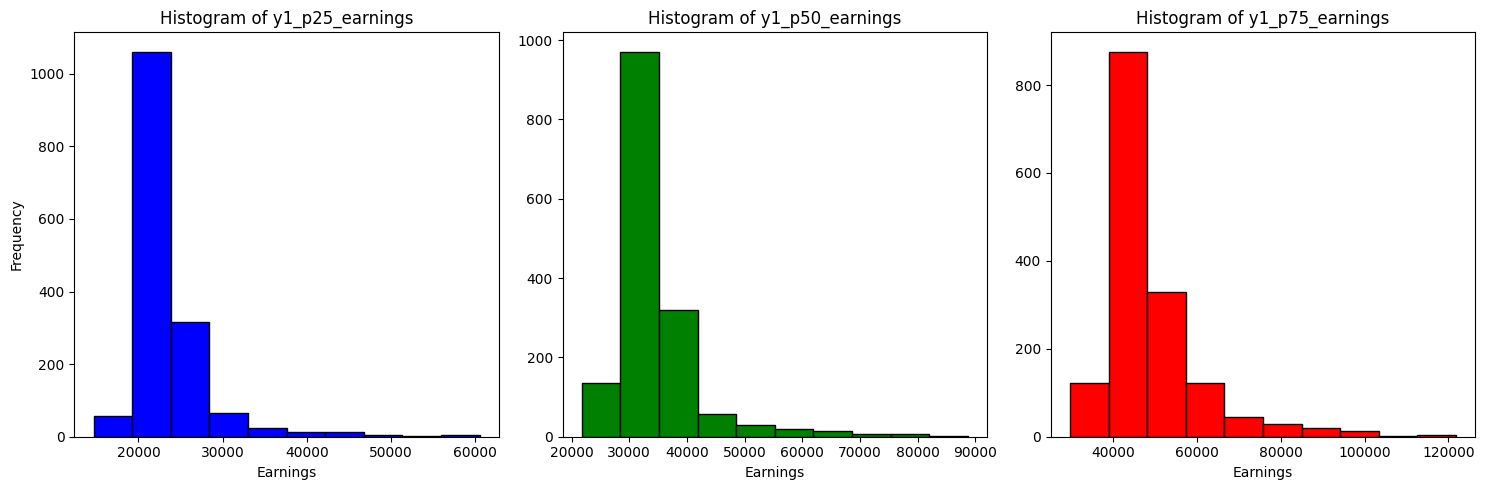

In [19]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting histogram for y1_p25_earnings
axs[0].hist(df1['y1_p25_earnings'], bins=10, color='blue', edgecolor='black')
axs[0].set_title('Histogram of y1_p25_earnings')
axs[0].set_xlabel('Earnings')
axs[0].set_ylabel('Frequency')

# Plotting histogram for y1_p50_earnings
axs[1].hist(df1['y1_p50_earnings'], bins=10, color='green', edgecolor='black')
axs[1].set_title('Histogram of y1_p50_earnings')
axs[1].set_xlabel('Earnings')
# axs[1].set_ylabel('Frequency')  # Optional, as it's the same as the first one

# Plotting histogram for y1_p75_earnings
axs[2].hist(df1['y1_p75_earnings'], bins=10, color='red', edgecolor='black')
axs[2].set_title('Histogram of y1_p75_earnings')
axs[2].set_xlabel('Earnings')
# axs[2].set_ylabel('Frequency')  # Optional, as it's the same as the first one

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

MEAN HISTOGRAM

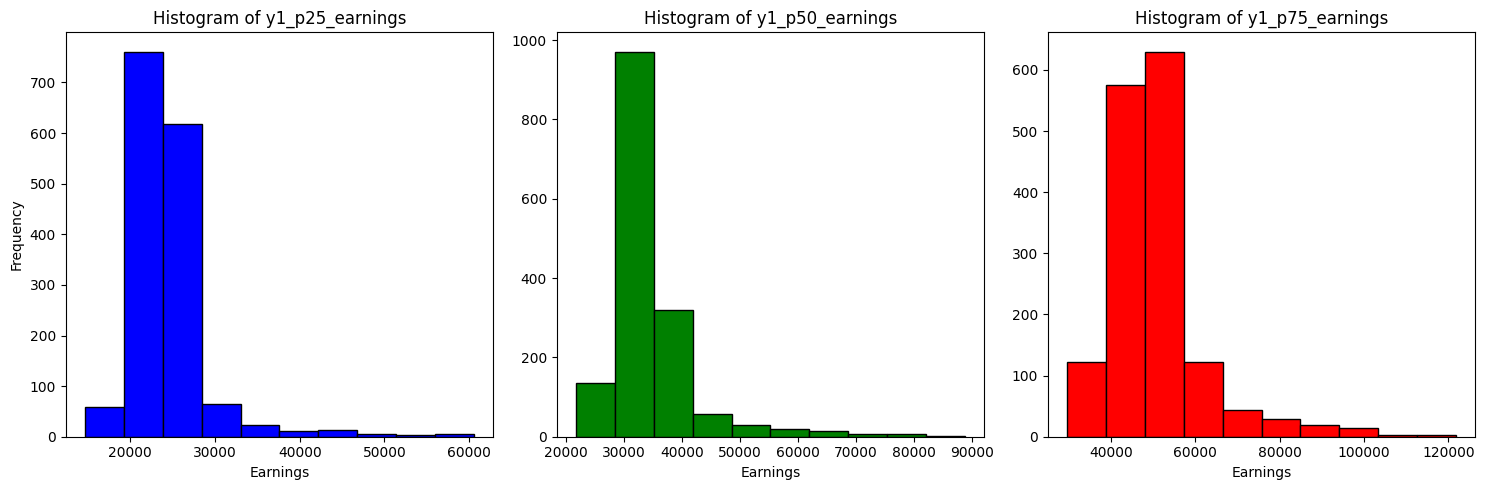

In [12]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting histogram for y1_p25_earnings
axs[0].hist(df1['y1_p25_earnings'], bins=10, color='blue', edgecolor='black')
axs[0].set_title('Histogram of y1_p25_earnings')
axs[0].set_xlabel('Earnings')
axs[0].set_ylabel('Frequency')

# Plotting histogram for y1_p50_earnings
axs[1].hist(df1['y1_p50_earnings'], bins=10, color='green', edgecolor='black')
axs[1].set_title('Histogram of y1_p50_earnings')
axs[1].set_xlabel('Earnings')
# axs[1].set_ylabel('Frequency')  # Optional, as it's the same as the first one

# Plotting histogram for y1_p75_earnings
axs[2].hist(df1['y1_p75_earnings'], bins=10, color='red', edgecolor='black')
axs[2].set_title('Histogram of y1_p75_earnings')
axs[2].set_xlabel('Earnings')
# axs[2].set_ylabel('Frequency')  # Optional, as it's the same as the first one

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

When we compare the mean histogram with the mdeian you can clearly see a large scew of earnings data with the mean. To maintain financial accuracy for my data I will continue with my analysis by converting the null data into the median

In [20]:

#Check  for nulls again
null_count = df1['y10_p50_earnings'].isnull().sum()

print(null_count)

0


In [21]:
#Convert the floats into integers :)

df1[columns_to_check] = df1[columns_to_check].astype(int)

df1

,dod_occ_code,label_dod_occ_code,State,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
0,0,All occupations,National (50 states +\nDC),23330,31130,36480,34630,45420,52620,51030,65130,75520
1,0,All occupations,Alabama,24470,32630,37650,36910,47630,54700,56230,70820,80150
2,0,All occupations,Alaska,28230,37160,43430,41430,54130,63950,58250,73590,85230
3,0,All occupations,Arizona,23760,32390,37990,37110,48080,55870,58340,69480,80140
4,0,All occupations,Arkansas,19730,24980,28670,27790,36330,42090,38670,49580,58230
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,18X,Service and Supply Handlers,Wisconsin,18770,25330,35920,26810,35380,51220,36780,45800,71380
1559,18X,Service and Supply Handlers,Wyoming,22710,29970,35920,32830,43650,51220,46910,60635,71380
1560,NaN,NaN,NaN,22710,29970,35920,32830,43650,51220,46910,60635,71380
1561,NaN,NaN,NaN,22710,29970,35920,32830,43650,51220,46910,60635,71380


In [22]:
#Saving the above changes to excel and then take into SQL for sorting

df1.to_excel('VEDATA_Median_Conversion.xlsx',)